In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('vgsales.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


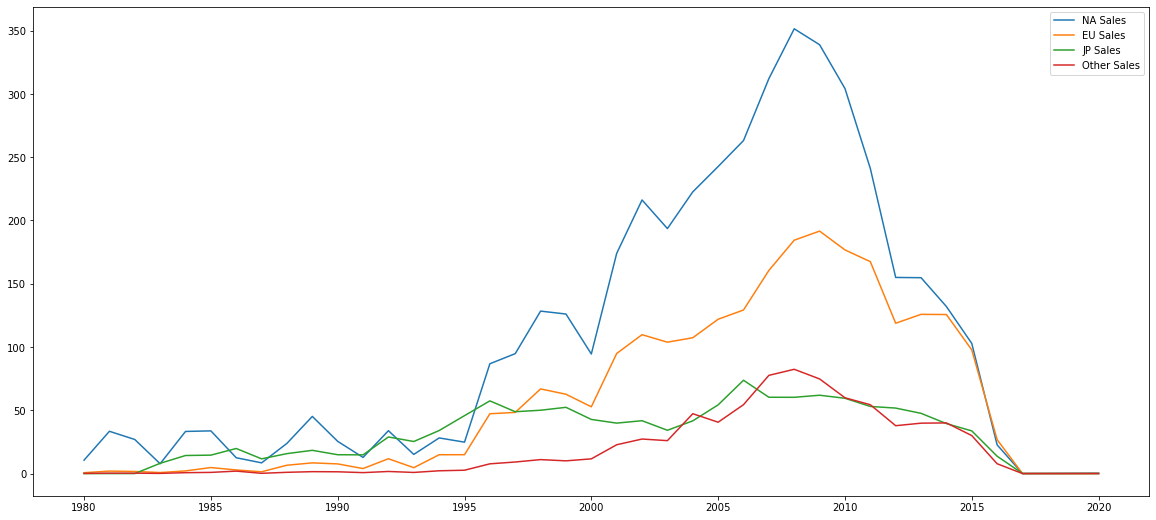

In [5]:
NA_average_sales = df.groupby(by=['Year'], as_index=False)['NA_Sales'].sum()
EU_average_sales = df.groupby(by=['Year'], as_index=False)['EU_Sales'].sum()
JP_average_sales = df.groupby(by=['Year'], as_index=False)['JP_Sales'].sum()
OT_average_sales = df.groupby(by=['Year'], as_index=False)['Other_Sales'].sum()

df_na_sales = NA_average_sales.sort_values('NA_Sales', ascending=False)
df_eu_sales = EU_average_sales.sort_values('EU_Sales', ascending=False)
df_jp_sales = JP_average_sales.sort_values('JP_Sales', ascending=False)
df_ot_sales = OT_average_sales.sort_values('Other_Sales', ascending=False)

plt.figure(figsize=(20,9))
plt.plot(NA_average_sales.Year, NA_average_sales.NA_Sales, label = "NA Sales")
plt.plot(EU_average_sales.Year, EU_average_sales.EU_Sales, label = "EU Sales")
plt.plot(JP_average_sales.Year, JP_average_sales.JP_Sales, label = "JP Sales")
plt.plot(OT_average_sales.Year, OT_average_sales.Other_Sales, label = "Other Sales")
plt.legend()
plt.show()

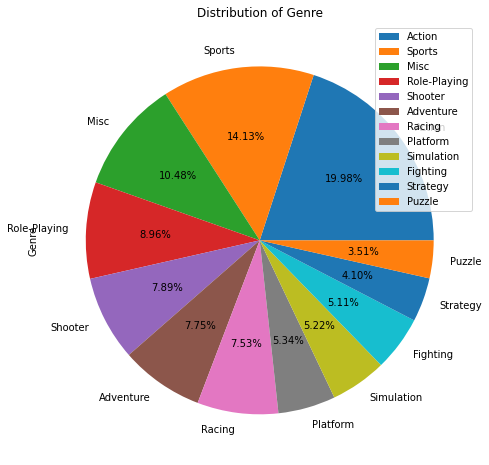

In [6]:
plt.figure(figsize=(8,8))
df['Genre'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Distribution of Genre")
plt.legend()
plt.show()

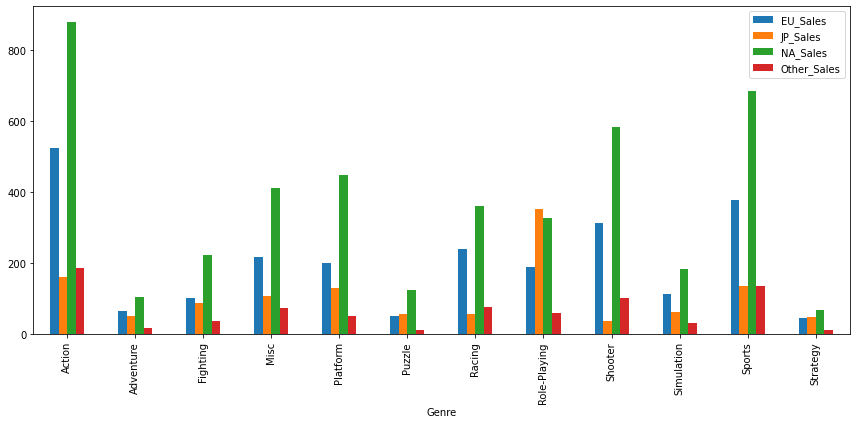

In [7]:
plt.rcParams["figure.figsize"] = (12,6)
df.pivot_table(values = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
               index = 'Genre', aggfunc='sum').plot(kind='bar')
plt.tight_layout()
plt.show()